In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/eBird/ebd_US-CA_201901_201912_relApr-2023/ebd_US-CA_201901_201912_relApr-2023.txt', sep='\t')

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_25228/2494448556.py:1: DtypeWarning: Columns (9,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/eBird/ebd_US-CA_201901_201912_relApr-2023/ebd_US-CA_201901_201912_relApr-2023.txt', sep='\t')


In [3]:
df.columns

Index(['GLOBAL UNIQUE IDENTIFIER', 'LAST EDITED DATE', 'TAXONOMIC ORDER',
       'CATEGORY', 'TAXON CONCEPT ID', 'COMMON NAME', 'SCIENTIFIC NAME',
       'SUBSPECIES COMMON NAME', 'SUBSPECIES SCIENTIFIC NAME', 'EXOTIC CODE',
       'OBSERVATION COUNT', 'BREEDING CODE', 'BREEDING CATEGORY',
       'BEHAVIOR CODE', 'AGE/SEX', 'COUNTRY', 'COUNTRY CODE', 'STATE',
       'STATE CODE', 'COUNTY', 'COUNTY CODE', 'IBA CODE', 'BCR CODE',
       'USFWS CODE', 'ATLAS BLOCK', 'LOCALITY', 'LOCALITY ID', 'LOCALITY TYPE',
       'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE',
       'TIME OBSERVATIONS STARTED', 'OBSERVER ID', 'SAMPLING EVENT IDENTIFIER',
       'PROTOCOL TYPE', 'PROTOCOL CODE', 'PROJECT CODE', 'DURATION MINUTES',
       'EFFORT DISTANCE KM', 'EFFORT AREA HA', 'NUMBER OBSERVERS',
       'ALL SPECIES REPORTED', 'GROUP IDENTIFIER', 'HAS MEDIA', 'APPROVED',
       'REVIEWED', 'REASON', 'TRIP COMMENTS', 'SPECIES COMMENTS',
       'Unnamed: 49'],
      dtype='object')

In [4]:
df.iloc[0, :]

GLOBAL UNIQUE IDENTIFIER      URN:CornellLabOfOrnithology:EBIRD:OBS698024716
LAST EDITED DATE                                  2021-08-05 02:45:57.629774
TAXONOMIC ORDER                                                         8078
CATEGORY                                                                spuh
TAXON CONCEPT ID                                            avibase-CA08045E
COMMON NAME                                                    Accipiter sp.
SCIENTIFIC NAME                                                Accipiter sp.
SUBSPECIES COMMON NAME                                                   NaN
SUBSPECIES SCIENTIFIC NAME                                               NaN
EXOTIC CODE                                                              NaN
OBSERVATION COUNT                                                          1
BREEDING CODE                                                            NaN
BREEDING CATEGORY                                                        NaN

In [5]:
df.iloc[0:10, :].T

,0,1,2,3,4,5,6,7,8,9
GLOBAL UNIQUE IDENTIFIER,URN:CornellLabOfOrnithology:EBIRD:OBS698024716,URN:CornellLabOfOrnithology:EBIRD:OBS692730992,URN:CornellLabOfOrnithology:EBIRD:OBS702777051,URN:CornellLabOfOrnithology:EBIRD:OBS697015061,URN:CornellLabOfOrnithology:EBIRD:OBS703645792,URN:CornellLabOfOrnithology:EBIRD:OBS699791078,URN:CornellLabOfOrnithology:EBIRD:OBS701988795,URN:CornellLabOfOrnithology:EBIRD:OBS697576904,URN:CornellLabOfOrnithology:EBIRD:OBS698385823,URN:CornellLabOfOrnithology:EBIRD:OBS693830964
LAST EDITED DATE,2021-08-05 02:45:57.629774,2019-01-02 13:51:35,2019-01-27 21:53:18,2021-03-18 00:43:01.179135,2020-01-27 18:00:05,2021-04-01 02:10:03.093984,2019-01-23 17:09:56,2019-01-30 00:41:59,2019-11-23 20:26:58,2021-03-25 11:05:49.608382
TAXONOMIC ORDER,8078,8078,8078,8078,8078,8078,10835,10835,10835,10835
CATEGORY,spuh,spuh,spuh,spuh,spuh,spuh,species,species,species,species
TAXON CONCEPT ID,avibase-CA08045E,avibase-CA08045E,avibase-CA08045E,avibase-CA08045E,avibase-CA08045E,avibase-CA08045E,avibase-7E327303,avibase-7E327303,avibase-7E327303,avibase-7E327303
COMMON NAME,Accipiter sp.,Accipiter sp.,Accipiter sp.,Accipiter sp.,Accipiter sp.,Accipiter sp.,Acorn Woodpecker,Acorn Woodpecker,Acorn Woodpecker,Acorn Woodpecker
SCIENTIFIC NAME,Accipiter sp.,Accipiter sp.,Accipiter sp.,Accipiter sp.,Accipiter sp.,Accipiter sp.,Melanerpes formicivorus,Melanerpes formicivorus,Melanerpes formicivorus,Melanerpes formicivorus
SUBSPECIES COMMON NAME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUBSPECIES SCIENTIFIC NAME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EXOTIC CODE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['COUNTRY'].value_counts()

United States    8694926
Name: COUNTRY, dtype: int64

In [7]:
df['STATE'].value_counts()

California    8694926
Name: STATE, dtype: int64

In [8]:
df['STATE CODE'].value_counts()

US-CA    8694926
Name: STATE CODE, dtype: int64

In [9]:
selected_columns = [
    'TAXON CONCEPT ID',
    'COMMON NAME', 'SCIENTIFIC NAME',
    'OBSERVATION COUNT',
    'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE'
]

In [10]:
df_filtered = df[
    (df['LATITUDE']>=36.4701132878)
    &
    (df['LATITUDE']<=42.009518)
    &
    (df['LONGITUDE']>= -124.409591)
    &
    (df['LONGITUDE']<= -114.131211)
][selected_columns].copy()

In [11]:
df_filtered.shape

(5168169, 7)

## Reduction from 8.69 million to 5.16 million for the bounding box

In [12]:
df_filtered['OBSERVATION COUNT'].value_counts()

1       1700308
2        978793
3        457009
4        344981
5        239338
         ...   
852           1
4750          1
1061          1
2255          1
988           1
Name: OBSERVATION COUNT, Length: 1431, dtype: int64

In [13]:
df_filtered[~df_filtered['OBSERVATION COUNT'].str.isnumeric()]['OBSERVATION COUNT'].value_counts()

X    107218
Name: OBSERVATION COUNT, dtype: int64

In [20]:
df_filtered[df_filtered['OBSERVATION COUNT'].str.isnumeric()]['OBSERVATION COUNT'].values[0]

'1'

In [22]:
df_filtered['OBSERVATION COUNT'] = df_filtered['OBSERVATION COUNT'].apply(lambda x: 1 if x == 'X' else int(x))

In [24]:
df_filtered['OBSERVATION COUNT'].value_counts()

1       1807526
2        978793
3        457009
4        344981
5        239338
         ...   
852           1
4750          1
1061          1
2255          1
473           1
Name: OBSERVATION COUNT, Length: 1430, dtype: int64

In [25]:
df_filtered.shape

(5168169, 7)

In [26]:
df_filtered

,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,OBSERVATION COUNT,LATITUDE,LONGITUDE,OBSERVATION DATE
0,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.892331,-122.311800,2019-01-13
1,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.871270,-122.307890,2019-01-01
2,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.834029,-122.238747,2019-01-25
3,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.695328,-121.844741,2019-01-10
4,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.834029,-122.238747,2019-01-25
...,...,...,...,...,...,...,...
8694921,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,13,39.427357,-121.130547,2019-12-26
8694922,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,4,39.189706,-121.593404,2019-12-19
8694923,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,4,39.264460,-121.602397,2019-12-19
8694924,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,4,39.264460,-121.602397,2019-12-19


In [27]:
df_filtered['MONTH'] = df_filtered['OBSERVATION DATE'].apply(lambda x: x[5:7])

In [28]:
df_filtered

,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,OBSERVATION COUNT,LATITUDE,LONGITUDE,OBSERVATION DATE,MONTH
0,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.892331,-122.311800,2019-01-13,01
1,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.871270,-122.307890,2019-01-01,01
2,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.834029,-122.238747,2019-01-25,01
3,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.695328,-121.844741,2019-01-10,01
4,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.834029,-122.238747,2019-01-25,01
...,...,...,...,...,...,...,...,...
8694921,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,13,39.427357,-121.130547,2019-12-26,12
8694922,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,4,39.189706,-121.593404,2019-12-19,12
8694923,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,4,39.264460,-121.602397,2019-12-19,12
8694924,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,4,39.264460,-121.602397,2019-12-19,12


In [29]:
df_filtered['AVIBASEID'] = df_filtered['TAXON CONCEPT ID'].apply(lambda x: x[8:])

In [30]:
df_filtered

,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,OBSERVATION COUNT,LATITUDE,LONGITUDE,OBSERVATION DATE,MONTH,AVIBASEID
0,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.892331,-122.311800,2019-01-13,01,CA08045E
1,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.871270,-122.307890,2019-01-01,01,CA08045E
2,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.834029,-122.238747,2019-01-25,01,CA08045E
3,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.695328,-121.844741,2019-01-10,01,CA08045E
4,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.834029,-122.238747,2019-01-25,01,CA08045E
...,...,...,...,...,...,...,...,...,...
8694921,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,13,39.427357,-121.130547,2019-12-26,12,BC5A9498
8694922,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,4,39.189706,-121.593404,2019-12-19,12,BC5A9498
8694923,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,4,39.264460,-121.602397,2019-12-19,12,BC5A9498
8694924,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,4,39.264460,-121.602397,2019-12-19,12,BC5A9498


In [31]:
df_filtered['AVIBASEID'].nunique()

918

In [32]:
df_inat = pd.read_csv('./df_full_final_saved.csv')

In [37]:
avibase_ids_finalized = set(df_inat['aviID_short'].values)

In [38]:
df_filtered.shape

(5168169, 9)

In [39]:
df_filtered = df_filtered[df_filtered['AVIBASEID'].isin(avibase_ids_finalized)].copy()

In [40]:
df_filtered.shape

(3219048, 9)

## Further reduction in records from 5.16 million to 3.21 million

In [41]:
df_filtered['AVIBASEID'].nunique()

135

## Found data for 135 of 139 birds from iNaturalist

In [54]:
df_filtered['OBSERVATION COUNT'].sum()

160038754

In [45]:
df_filtered.groupby('MONTH').sum()['OBSERVATION COUNT']

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_25228/3522000221.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_filtered.groupby('MONTH').sum()['OBSERVATION COUNT']


MONTH
01     8911079
02     5700652
03     9447477
04    13734001
05    19059295
06    36645107
07    23786429
08     8429690
09     4966472
10     5045057
11    11104564
12    13208931
Name: OBSERVATION COUNT, dtype: int64

In [48]:
ebird_freq = (100*df_filtered.groupby('MONTH').sum()['OBSERVATION COUNT'])/df_filtered['OBSERVATION COUNT'].sum()

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_25228/2914753535.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ebird_freq = (100*df_filtered.groupby('MONTH').sum()['OBSERVATION COUNT'])/df_filtered['OBSERVATION COUNT'].sum()


In [62]:
ebird_freq_dict = ebird_freq.to_dict()

In [63]:
ebird_freq_dict

{'01': 5.568075717460284,
 '02': 3.562044728241261,
 '03': 5.903243285685666,
 '04': 8.581672036761796,
 '05': 11.909174823992943,
 '06': 22.89764577897176,
 '07': 14.862918140439909,
 '08': 5.267280448834287,
 '09': 3.1032933435610226,
 '10': 3.1523970750234658,
 '11': 6.938671866940429,
 '12': 8.253582754087176}

In [57]:
df_ebird_135 = df_filtered.pivot_table(index=['AVIBASEID', 'MONTH'],values='OBSERVATION COUNT', aggfunc='sum').reset_index()

In [64]:
df_ebird_135['normalized_observation_count'] = df_ebird_135.apply(
    lambda x: x['OBSERVATION COUNT']/ebird_freq_dict[x['MONTH']],
    axis=1
).copy()

In [65]:
df_ebird_135

,AVIBASEID,MONTH,OBSERVATION COUNT,normalized_observation_count
0,00124D98,01,29377,5275.969920
1,00124D98,02,20104,5643.949342
2,00124D98,03,22983,3893.283554
3,00124D98,04,23999,2796.541268
4,00124D98,05,29068,2440.807229
...,...,...,...,...
1572,FFF61080,08,1913,363.185522
1573,FFF61080,09,4658,1500.986044
1574,FFF61080,10,1955,620.162991
1575,FFF61080,11,1173,169.052525


In [68]:
ebird_135_norm_counts = df_ebird_135.groupby('AVIBASEID').sum()['normalized_observation_count'].to_dict()

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_25228/2495688782.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ebird_135_norm_counts = df_ebird_135.groupby('AVIBASEID').sum()['normalized_observation_count'].to_dict()


In [69]:
df_ebird_135['fractional_norm_count'] = df_ebird_135.apply(
    lambda x: x['normalized_observation_count']/ebird_135_norm_counts[x['AVIBASEID']],
    axis=1
).copy()

In [70]:
df_ebird_135

,AVIBASEID,MONTH,OBSERVATION COUNT,normalized_observation_count,fractional_norm_count
0,00124D98,01,29377,5275.969920,0.107478
1,00124D98,02,20104,5643.949342,0.114974
2,00124D98,03,22983,3893.283554,0.079311
3,00124D98,04,23999,2796.541268,0.056969
4,00124D98,05,29068,2440.807229,0.049722
...,...,...,...,...,...
1572,FFF61080,08,1913,363.185522,0.056212
1573,FFF61080,09,4658,1500.986044,0.232313
1574,FFF61080,10,1955,620.162991,0.095985
1575,FFF61080,11,1173,169.052525,0.026165


In [75]:
df_ebird_135_final = df_ebird_135.pivot_table(index=['AVIBASEID'], columns=['MONTH'], values='fractional_norm_count', aggfunc='sum')

In [76]:
df_ebird_135_final

MONTH,01,02,03,04,05,06,07,08,09,10,11,12
AVIBASEID,,,,,,,,,,,,
00124D98,0.107478,0.114974,0.079311,0.056969,0.049722,0.016776,0.024835,0.092066,0.180225,0.125314,0.063691,0.088639
01060BFD,0.039675,0.040806,0.013185,0.063235,0.003330,0.000137,0.046361,0.303887,0.314738,0.095122,0.050674,0.028851
018B3169,0.237519,0.304570,0.115802,0.041342,0.001775,0.000343,0.000244,0.001777,0.005741,0.055841,0.114796,0.120250
03AC32BA,0.167936,0.359255,0.081609,0.013187,0.001986,0.000508,0.001266,0.001909,0.007297,0.059247,0.109766,0.196035
0413ED30,0.051661,0.075763,0.045442,0.020449,0.000505,NaN,0.003707,0.088413,0.277268,0.245643,0.114520,0.076630
...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.134541,0.133108,0.103116,0.062517,0.029890,0.010911,0.014576,0.053594,0.184517,0.137562,0.057189,0.078480
FD2B0309,0.190501,0.035369,0.042008,0.044393,0.061618,0.022693,0.073774,0.133942,0.195460,0.097306,0.039567,0.063368
FED3756C,0.208153,0.218695,0.127838,0.071255,0.043723,0.015893,0.013131,0.023813,0.034037,0.069501,0.080277,0.093684


In [77]:
df_ebird_135_final.fillna(0, inplace=True)

In [78]:
df_ebird_135_final

MONTH,01,02,03,04,05,06,07,08,09,10,11,12
AVIBASEID,,,,,,,,,,,,
00124D98,0.107478,0.114974,0.079311,0.056969,0.049722,0.016776,0.024835,0.092066,0.180225,0.125314,0.063691,0.088639
01060BFD,0.039675,0.040806,0.013185,0.063235,0.003330,0.000137,0.046361,0.303887,0.314738,0.095122,0.050674,0.028851
018B3169,0.237519,0.304570,0.115802,0.041342,0.001775,0.000343,0.000244,0.001777,0.005741,0.055841,0.114796,0.120250
03AC32BA,0.167936,0.359255,0.081609,0.013187,0.001986,0.000508,0.001266,0.001909,0.007297,0.059247,0.109766,0.196035
0413ED30,0.051661,0.075763,0.045442,0.020449,0.000505,0.000000,0.003707,0.088413,0.277268,0.245643,0.114520,0.076630
...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.134541,0.133108,0.103116,0.062517,0.029890,0.010911,0.014576,0.053594,0.184517,0.137562,0.057189,0.078480
FD2B0309,0.190501,0.035369,0.042008,0.044393,0.061618,0.022693,0.073774,0.133942,0.195460,0.097306,0.039567,0.063368
FED3756C,0.208153,0.218695,0.127838,0.071255,0.043723,0.015893,0.013131,0.023813,0.034037,0.069501,0.080277,0.093684


In [79]:
from sklearn.decomposition import PCA

In [80]:
pca = PCA(n_components=12)

In [81]:
pca.fit(df_ebird_135_final.values)

PCA(n_components=12)

In [82]:
pca.explained_variance_ratio_

array([4.43870229e-01, 2.64645914e-01, 1.31859861e-01, 4.54558903e-02,
       3.71080157e-02, 2.79987895e-02, 1.66065813e-02, 1.43442509e-02,
       9.75639088e-03, 5.17735861e-03, 3.17671848e-03, 9.56714468e-33])

In [83]:
np.cumsum(pca.explained_variance_ratio_)

array([0.44387023, 0.70851614, 0.840376  , 0.88583189, 0.92293991,
       0.9509387 , 0.96754528, 0.98188953, 0.99164592, 0.99682328,
       1.        , 1.        ])

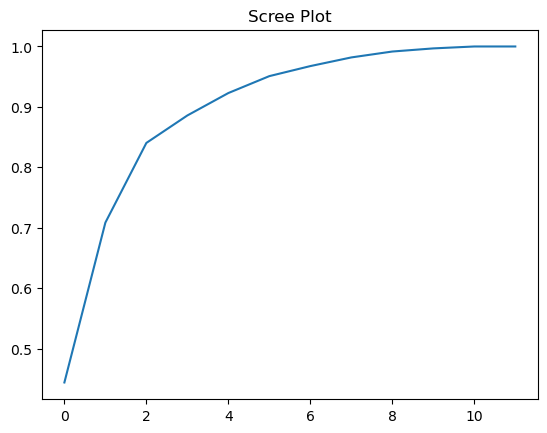

In [86]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Scree Plot")
plt.show()

<Axes: xlabel='MONTH'>

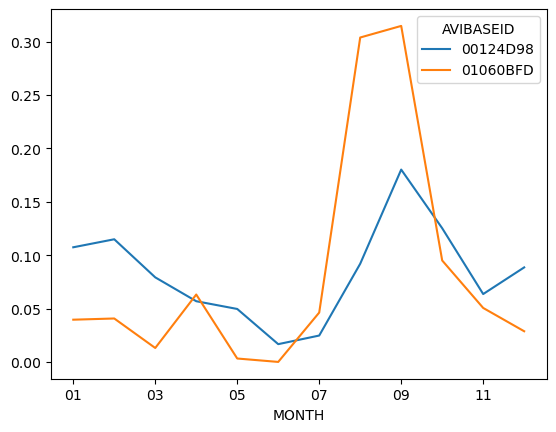

In [88]:
df_ebird_135_final.iloc[0:2, :].T.plot()

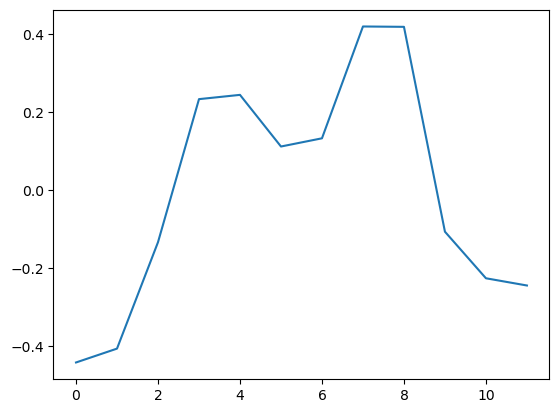

In [89]:
plt.plot(pca.components_[0])

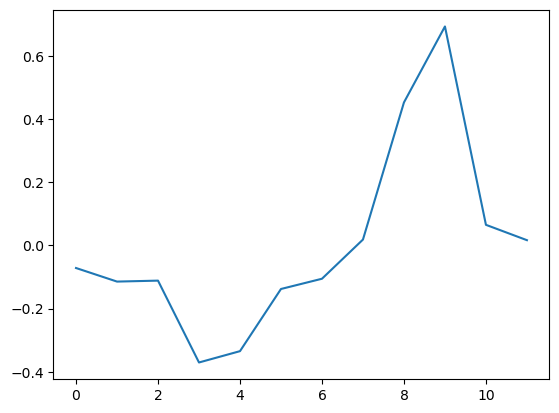

In [90]:
plt.plot(pca.components_[1])

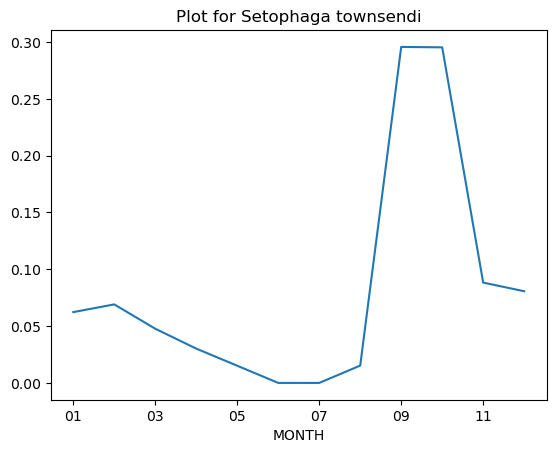

In [95]:
df_ebird_135_final.loc['F6C6C3F7', :].plot()
plt.title('Plot for Setophaga townsendi')
plt.show()

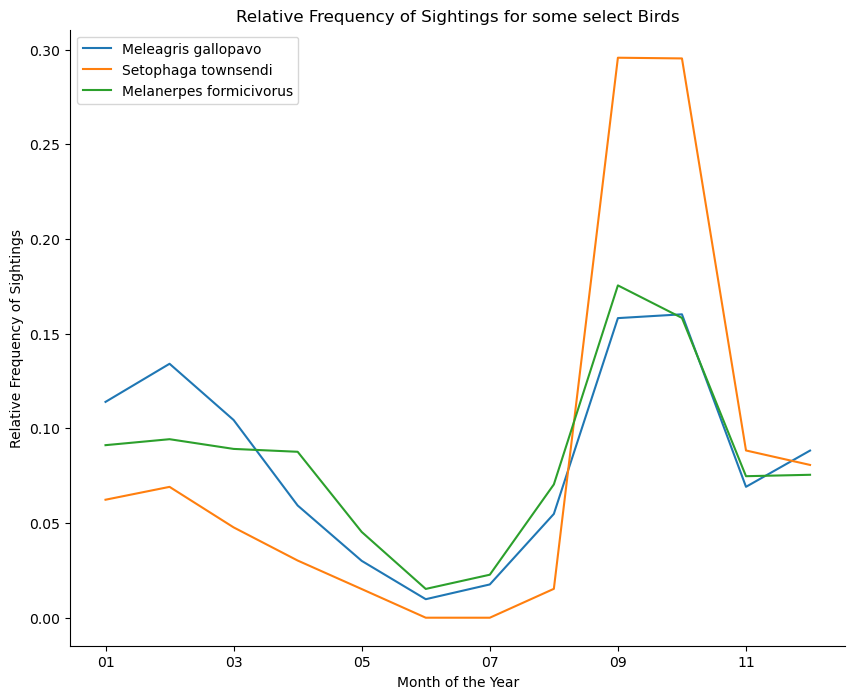

In [96]:
avibase_ids_3birds = ['9C5ED06A', 'F6C6C3F7', '7E327303']
fig, ax = plt.subplots(1,1,figsize=(10,8))
df_ebird_135_final.loc[avibase_ids_3birds, :].T.plot(ax=ax)
plt.legend(['Meleagris gallopavo',
'Setophaga townsendi',
'Melanerpes formicivorus'])
plt.title("Relative Frequency of Sightings for some select Birds")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Month of the Year")
ax.set_ylabel("Relative Frequency of Sightings")
plt.show()

In [97]:
from scipy.stats import wasserstein_distance

In [98]:
pca_0_ebird = pca.components_[0]
pca_0_iNat = [-0.35573337, -0.20986457, -0.14651709,  0.32215211,  0.3638388 ,
         0.37216271,  0.27346115,  0.21639022,  0.07833495, -0.17139628,
        -0.35997586, -0.38285277]

In [99]:
wasserstein_distance(pca_0_ebird, pca_0_iNat)

0.05415367936521805

In [100]:
pca_1_ebird = pca.components_[1]
pca_1_iNat = [-0.17257609, -0.13355367, -0.28602856, -0.42885556, -0.21925946,
        -0.14144298,  0.10355929,  0.51894009,  0.52696792,  0.20732324,
         0.10616067, -0.08123489]

In [101]:
wasserstein_distance(pca_1_ebird, pca_1_iNat)

0.0719466416631852